# Research Question: 

## Is there an association between average or median household income and the number of Parking Enforcement service requests? 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the two files 
requests = pd.read_csv('_311requests.csv')
income = pd.read_csv('WardIncome.csv')


In [3]:
# Subset the _311requests data to create a data set of just "Parking Enforcement" related service requests
parking = requests.loc[requests['SERVICECODEDESCRIPTION'] == 'Parking Enforcement']
parking


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
9,-77.014499,38.900429,1804423,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:30+00,2014/01/02 11:58:09+00,...,398742.48,136952.11,38.900421,-77.014497,WASHINGTON,DC,20001.0,305616.0,Ward 6,mr. lester...please ticket and tow
10,-77.066282,38.910015,1804424,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:39:46+00,2014/01/02 10:59:48+00,...,394251.48,138018.30,38.910008,-77.066279,WASHINGTON,DC,20007.0,272751.0,Ward 2,please ticket and tow.....helen
17,-77.006891,38.833219,1804431,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:35+00,2014/01/02 11:17:23+00,...,399401.87,129491.23,38.833211,-77.006889,WASHINGTON,DC,20032.0,29779.0,Ward 8,NaN
19,-77.035739,38.934271,1804433,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:34:13+00,2014/01/02 08:44:07+00,...,396901.55,140709.38,38.934263,-77.035737,WASHINGTON,DC,20010.0,226206.0,Ward 1,NaN
20,-76.991520,38.903684,1804434,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:45:02+00,2014/01/02 10:15:46+00,...,400735.75,137313.44,38.903677,-76.991518,WASHINGTON,DC,20002.0,285821.0,Ward 5,"emnp verifying 8 signs 8-2:00pm on Jan 4, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321917,-77.018668,38.909446,2126335,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/25 10:48:29+00,2014/01/25 11:16:40+00,...,398381.06,137953.23,38.909439,-77.018666,WASHINGTON,DC,20001.0,237432.0,Ward 6,CALLER IS BLOCKED IN...IN ALLEY BEHIND 1427
321942,-77.068054,38.911070,2126360,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/02/25 16:49:05+00,2014/02/25 22:02:46+00,...,394097.83,138135.52,38.911063,-77.068052,WASHINGTON,DC,20007.0,272791.0,Ward 2,caller stating that the resident at 1613 34th ...
321949,-77.029184,38.918857,2126367,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/03/05 09:07:08+00,2014/03/05 09:36:12+00,...,397469.31,138998.08,38.918849,-77.029182,WASHINGTON,DC,20009.0,284230.0,Ward 1,dark gray honda crv with md tags parked illega...
321960,-77.018674,38.885577,2126378,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 18:07:31+00,2014/01/02 18:08:17+00,...,398379.99,135303.57,38.885570,-77.018672,WASHINGTON,DC,20024.0,276666.0,Ward 6,emnp sign verification


In [6]:
# Aggregate the data to get the number of 311 requests by Ward

ward_requests = parking[['WARD', 'X']].groupby(['WARD']).agg('count')
ward_requests = ward_requests.reset_index()
ward_requests.columns = ['Ward', 'Number of 311 Parking Enforcement Requests']
ward_requests

,Ward,Number of 311 Parking Enforcement Requests
0,Ward 1,4282
1,Ward 2,5572
2,Ward 3,2139
3,Ward 4,2048
4,Ward 5,3599
5,Ward 6,6318
6,Ward 7,1405
7,Ward 8,1351


In [55]:
# Merge the ward income data set and the aggregated, subsetted 311 request data set (inner join) to create one dataset with the median income, mean income, and number of parking enforcement requests for each ward
merge = pd.merge(income, ward_requests, how = 'inner', on = ['Ward'])
merge


,Ward,MedianHHincome,MeanHHincome,Number of 311 Parking Enforcement Requests
0,Ward 1,82159,106388,4282
1,Ward 2,100388,140459,5572
2,Ward 3,112873,176921,2139
3,Ward 4,74600,111933,2048
4,Ward 5,57554,77329,3599
5,Ward 6,94343,117002,6318
6,Ward 7,39165,53093,1405
7,Ward 8,30910,44245,1351


Text(0.5, 1.0, 'Scatterplot of Median Household Income & Number of Parking Enforcement Requests')

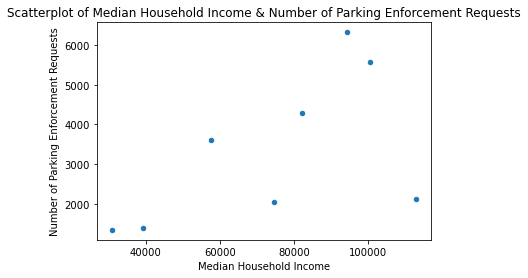

In [56]:
# Create a graph/plot to illustrate the relationship between median household income (independent variable) and number of parking enforcement requests (dependent variable)

merge.plot.scatter('MedianHHincome', 'Number of 311 Parking Enforcement Requests')
plt.xlabel("Median Household Income")
plt.ylabel("Number of Parking Enforcement Requests")
plt.title("Scatterplot of Median Household Income & Number of Parking Enforcement Requests")


# Describe/interpret the results with respect to the research question
The number of parking enforcement requests tends to increase as the median household income increases. There is one outlier at the upper range of median household incomes where the number of parking enforcement requests drops.

Text(0.5, 1.0, 'Scatterplot of Average Household Income & Number of Parking Enforcement Requests')

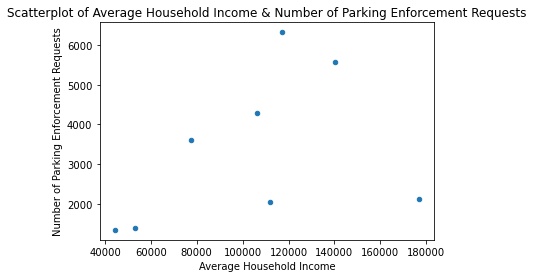

In [58]:
# Create a graph/plot to illustrate the relationship between mean household income (independent variable) and number of parking enforcement requests (dependent variable)
merge.plot.scatter('MeanHHincome', 'Number of 311 Parking Enforcement Requests')
plt.xlabel('Average Household Income')
plt.ylabel('Number of Parking Enforcement Requests')
plt.title('Scatterplot of Average Household Income & Number of Parking Enforcement Requests')


# Describe/interpret the results with respect to the research question
The number of parking enforcement requests tends to increase as the average household income increases. There is one outlier at the upper range of average household incomes where the number of parking enforcement requests drops.